## Linear Regression

In [1]:
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('funda-amsterdam.csv')
#df = df.sort_values(by='subscribers', ascending=False) #sort the data set to see the biggest channels first

df.head(10)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900


Now we will plot the data to identify and remove any outliers.

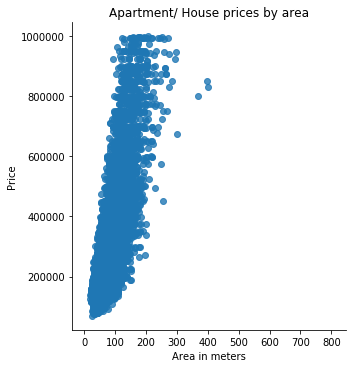

In [41]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Area in meters')
plt.ylabel('Price')
plt.title('Apartment/ House prices by area')
plt.show()

There are some unrealistically low prices in the data set. We will remove any values with a price lower than 5000.

In [42]:
df = df[df["price"]>5000].dropna() #remove row with Nan value


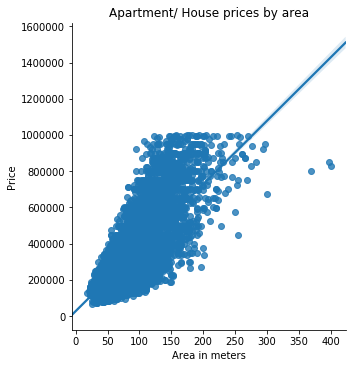

In [43]:
sns.lmplot(x='area', y='price', data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Area in meters')
plt.ylabel('Price')
plt.title('Apartment/ House prices by area')
plt.show()

## Simple Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[['area']] 
y = df['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals.

The regression line is equal to y = 27983.930 + 3498.814X


Or, in a pretty Markdown formula (using $ to begin and end a formula):

$y= 27983.90 + 3498.814x$

Where _y_ represents the price of the property and _x_ is area in square meters.

Now, let's use our model to predict the values for all channels in our dataset:

In [45]:
df['price'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(30)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_t
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,405855.880756,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,510.0
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,192428.204791,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,215.0
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,433846.395637,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,325.0
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,230915.162752,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,315.0
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,248409.234552,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,200.0
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,465335.724877,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,515.0
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,251908.048913,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,200.0
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,570300.155680,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,599.0
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,325383.150474,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,249.0
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,262404.491993,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,300.0


In [46]:
lm.predict([[70]])

array([272900.93507299])

For a house/ apartment of 70 square meters the cost is estimated to be about 272,900 euros

In [48]:
print(f"The predicted price is equal to {lm.predict([[70]])[0]:.0f} euros")

The predicted price is equal to 272901 euros


In [ ]:
df['price_p']=lm.predict

In [ ]:
house= df[df["address"]]=="Slichtenhorststraat 10"
house.head()
residual = house["price"] - df["price_p"]
df.head()


For the house at the address Slichtenhorststraat 10, the price is estimated to be about 426,848 euros.